### Part 1: The Gravitation Potential of the Earth

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import quad

/var/folders/14/fj700jh56x59_lmgd2fdd6g00000gn/T/ipykernel_75738/1433669796.py:9: RuntimeWarning: divide by zero encountered in divide
  phi = np.where(r > R, -G*M/r, np.nan)


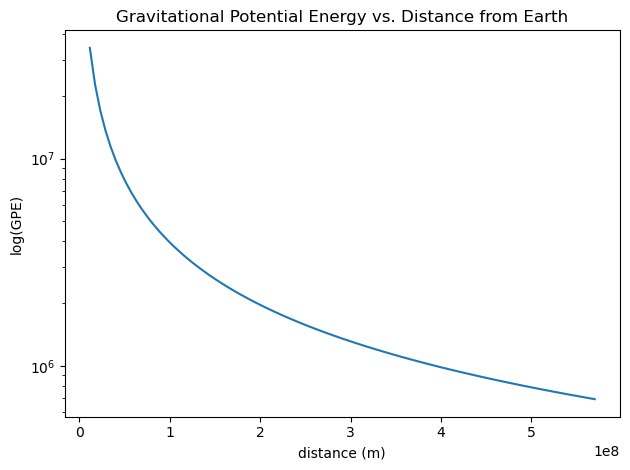

In [42]:
# Part 1.1-1.2: Define function that returns the potential, make 1D plot of the potential

def potential(M, xm, ym, x, y, R):
    xr = xm - x
    yr = ym - y
    G = 6.67e-11
    r = np.sqrt(xr**2 + yr**2)
    # phi = -G*M/r
    phi = np.where(r > R, -G*M/r, np.nan)
    return phi

dist2moon = 3.8e8 # meters
massE = 5.9e24 # kg
dist = 1.5*dist2moon # meters
radE = 6.378e6 # meters

x = np.linspace(0,dist,100) # meters
y = np.absolute(potential(massE, 0, 0, x, 0, radE)) # J

fig1, ax1 = plt.subplots(1,1)
ax1.plot(x, y)
ax1.set_yscale("log")
ax1.set_xlabel("distance (m)")
ax1.set_ylabel("log(GPE)")
ax1.set_title("Gravitational Potential Energy vs. Distance from Earth")
plt.tight_layout()

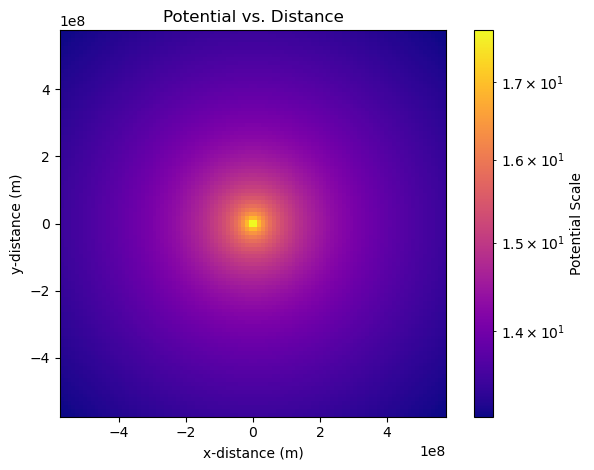

In [31]:
# Part 1.3: make a 2D color-mesh plot of the potential

x = np.linspace(-dist,dist,100) # meters
y = np.linspace(-dist,dist,100) # meters

xgrid, ygrid = np.meshgrid(x,y)
z = np.log(np.absolute(potential(massE, 0, 0, xgrid, ygrid, radE))) # J

fig2, ax2 = plt.subplots(1,1)
mesh = ax2.pcolormesh(xgrid, ygrid, z, cmap = cm.plasma, norm = "log")
ax2.set_xlabel("x-distance (m)")
ax2.set_ylabel("y-distance (m)")
ax2.set_title("Potential vs. Distance")
ax2.set_aspect("equal")

cbar = fig2.colorbar(mesh)
cbar.set_label("Potential Scale")
plt.tight_layout()

### Part 2: The Gravitational Potential of the Earth-Moon System

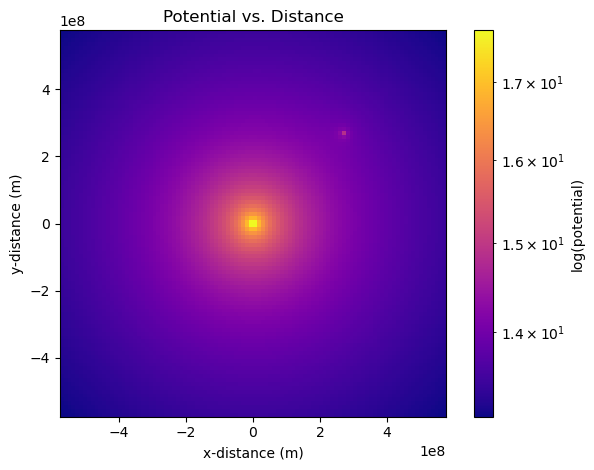

In [35]:
# Part 2.1: Make 2D color-mesh plot of potential

massM = 7.3e22 # kg
radM = 1.737e6 # meters
xMoon = dist2moon/np.sqrt(2)
yMoon = dist2moon/np.sqrt(2)

def potential2(Me, Mm, xe, ye, xm, ym, x, y, Re, Rm):
    xre = xe - x
    yre = ye - y
    xrm = xm - x
    yrm = ym - y
    G = 6.67e-11
    re = np.sqrt(xre**2 + yre**2)
    rm = np.sqrt(xrm**2 + yrm**2)

    phiE = np.where(re > Re, -G*Me/re, np.nan)
    phiM = np.where(rm > Rm, -G*Mm/rm, np.nan)
    
    return phiE + phiM

x = np.linspace(-dist,dist,100) # meters
y = np.linspace(-dist,dist,100) # meters

xgrid, ygrid = np.meshgrid(x,y)
z = np.log(np.absolute(potential2(massE, massM, 0, 0, xMoon, yMoon, xgrid, ygrid, radE, radM))) # J

fig3, ax3 = plt.subplots(1,1)
mesh = ax3.pcolormesh(xgrid, ygrid, z, cmap = cm.plasma, norm = "log")
ax3.set_xlabel("x-distance (m)")
ax3.set_ylabel("y-distance (m)")
ax3.set_title("Potential vs. Distance")
ax3.set_aspect("equal")

cbar = fig3.colorbar(mesh)
cbar.set_label("log(potential)")
plt.tight_layout()

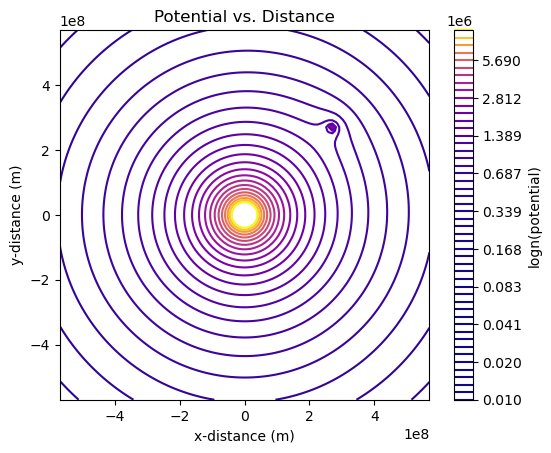

In [43]:
# Part 2.2: Make 2D contour plot of potential 

fig4, ax4 = plt.subplots(1,1)

z = (np.absolute(potential2(massE, massM, 0, 0, xMoon, yMoon, xgrid, ygrid, radE, radM))) # J

lvl = np.logspace(4, 7, 50)
contour = ax4.contour(xgrid, ygrid, z, levels = lvl, cmap = cm.plasma)
ax4.set_aspect("equal")

ax4.set_xlabel("x-distance (m)")
ax4.set_ylabel("y-distance (m)")
ax4.set_title("Potential vs. Distance")

cbar = fig4.colorbar(contour)
cbar.set_label("logn(potential)")

### Part 3: The Gravitational Force Field of the Earth-Moon System

Text(0.5, 1.0, 'Force on Apollo 11 Command Module vs. Distance')

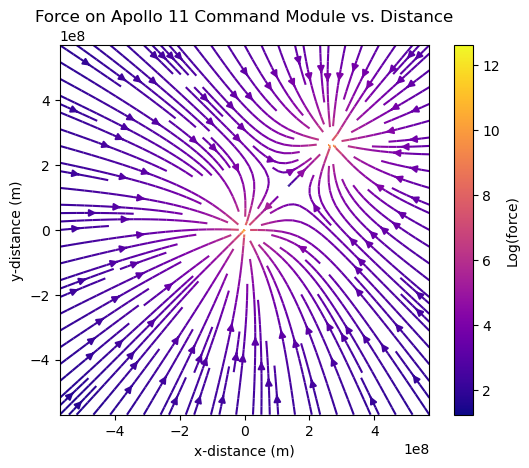

In [44]:
# part 3.1-3.2: code function that returns gravitational force and make 2D streamplot of force

def force(M1, m2, x1, y1, x2, y2):
    G = 6.67e-11
    rx = x2-x1
    ry = y2-y1
    r = np.sqrt(rx**2 + ry**2)
    r_2 = r**2
    r_hatx = rx/r
    r_haty = ry/r

    if np.isclose(x1, x2) and np.isclose(y1, y2):
        Fx = np.nan
        Fy = np.nan
    else:
        Fx = -G*M1*m2*r_hatx/r_2
        Fy = -G*M1*m2*r_haty/r_2

    return Fx, Fy

massA = 5500 # kg

x = np.linspace(-dist,dist,100) # meters
y = np.linspace(-dist,dist,100) # meters
xgrid, ygrid = np.meshgrid(x,y)

zx = np.zeros((100, 100))
zy = np.zeros((100, 100)) 

for y in range(100):
    for x in range (100):

        zE_x, zE_y = force(massE, massA, 0, 0, xgrid[y,x], ygrid[y,x])
        zM_x, zM_y = force(massE, massA, xMoon, yMoon, xgrid[y,x], ygrid[y,x])

        zx[y,x] += (zE_x + zM_x)
        zy[y,x] += (zE_y + zM_y)

colors = np.log(np.hypot(zx, zy))

fig5, ax5 = plt.subplots(1,1)
stream = ax5.streamplot(xgrid, ygrid, zx, zy, color = colors, cmap = cm.plasma, density = 1.5)
cbar = fig5.colorbar(stream.lines)
cbar.set_label("Log(force)")
ax5.set_aspect("equal")
ax5.set_xlabel("x-distance (m)")
ax5.set_ylabel("y-distance (m)")
ax5.set_title("Force on Apollo 11 Command Module vs. Distance")

### Part 4: Altitude of the Saturn V Rocket

In [40]:
# Part 4.1: calculate the burn time T

m0 = 2.8e6 # kg
mf = 7.5e5 # kg
m_dot = 1.3e4 # kg/s
ve = 2.4e3 # m/s
g = 9.81 # m/s

T = (m0 - mf)/m_dot
print(f"The burn time (T) for the Saturn V rocket is {T:.2f} seconds.")

The burn time (T) for the Saturn V rocket is 157.69 seconds.


In [38]:
# Part 4.2: Define function that returns change in velocity

def delta_v(t, m_wet, m_dry, burn_rate, exhaust_s, g):
    T = (m_wet - m_dry)/burn_rate 
    if t <= T:
        delV = exhaust_s * np.log(m_wet/(m_wet - burn_rate*t)) - g*t
    else:
        delV = 0
    return delV

In [39]:
# Part 4.3: Compute altitude of rocket from 0 to T

height, height_err = quad(delta_v, 0, T, args = (m0, mf, m_dot, ve, g))
print(f"The altitude of the rocket at the end of the burn is {height:.8f} m. The error in the calculation is {height_err:.8f} m.")


The altitude of the rocket at the end of the burn is 74093.98013366 m. The error in the calculation is 0.00000006 m.
